In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0001053584"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0001053584
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,MACATAWA BANK CORP
Ticker,MCBC


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,59.0,6.221525e+00,3.878500e+00,1.87,3.68,4.78,9.46,14.62
interest income,59.0,1.897982e+07,7.918074e+06,16373.00,13008500.00,16269000.00,24032500.00,35683000.00
net income,59.0,1.532374e+06,7.922095e+06,-35057000.00,1993500.00,2840000.00,4597000.00,21234000.00
net interest income,59.0,1.279763e+07,2.643987e+06,10936.00,11301500.00,12705000.00,14670000.00,17083000.00
provision for loan losses,27.0,-5.685185e+05,5.335203e+05,-1750000.00,-1000000.00,-500000.00,-250000.00,850000.00


# Plots

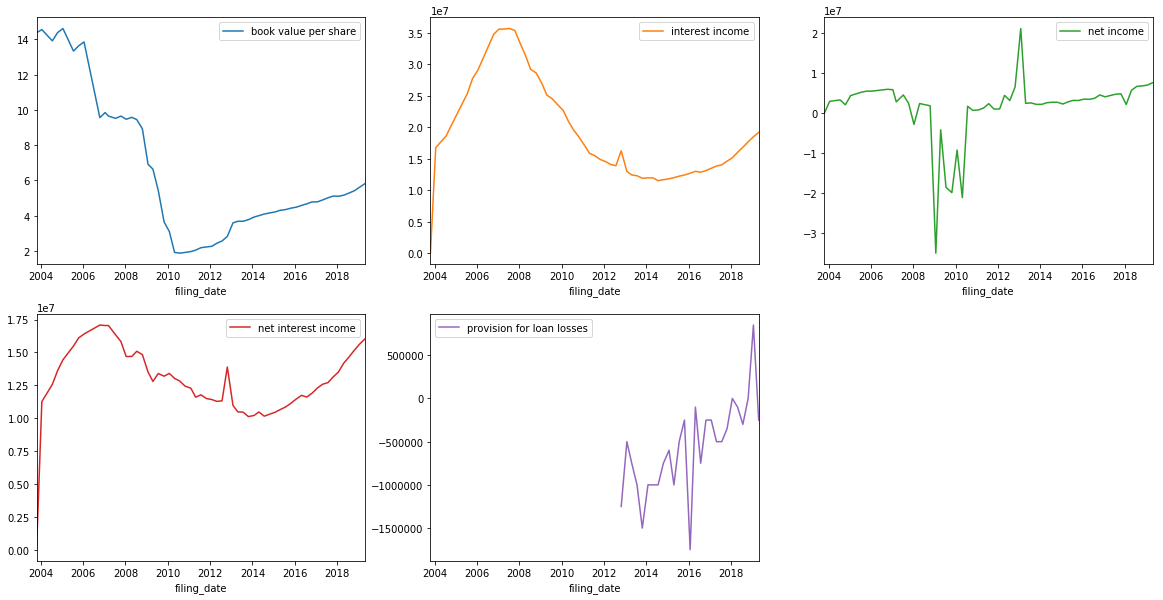

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0001053584 book value per share                             2004Q1    missing   
           book value per share                             2005Q1    missing   
           book value per share        2006Q1 to 2006Q2: 2 periods    missing   
           book value per share                             2007Q1    missing   
           interest income                                  2004Q1    missing   
           interest income                                  2005Q1    missing   
           interest income             2006Q1 to 2006Q2: 2 periods    missing   
           interest income                                  2007Q1    missing   
           net income                                       2004Q1    missing   
           net income                                       2005Q1    missing   
           net income                  2006Q1 to 2006Q2: 2 periods    missing   
           net income                                       2006Q4  duplicate   
           net income                                       2007Q1    missing   
           net interest income                              2004Q1    missing   
           net interest income                              2005Q1    missing   
           net interest income         2006Q1 to 2006Q2: 2 periods    missing   
           net interest income                              2007Q1    missing   
           provision for loan losses  2003Q3 to 2012Q2: 36 periods    missing   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0001053584 book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net income                     Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()